# Demonstration

This notebook serves as a demonstration of the `sklearn` library to use classic machine learning algorithms. We will use the Iris plants dataset as an example for simple visualization and classification.


## Imports


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import Bunch
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_confusion_matrix, plot_evaluation, plot_decision_boundaries

## Example pipeline


### Load the dataset


In [2]:
data: Bunch = load_iris()  # type: ignore
X, y, feature_names, class_names = (
    data.data,
    data.target,
    data.feature_names,
    data.target_names,
)

print(f"{feature_names = }")
print(f"{class_names = }")

df = pd.DataFrame(X, columns=feature_names)
df["species"] = [class_names[i] for i in y]
display(df)

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names = array(['setosa', 'versicolor', 'virginica'], dtype='<U10')


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

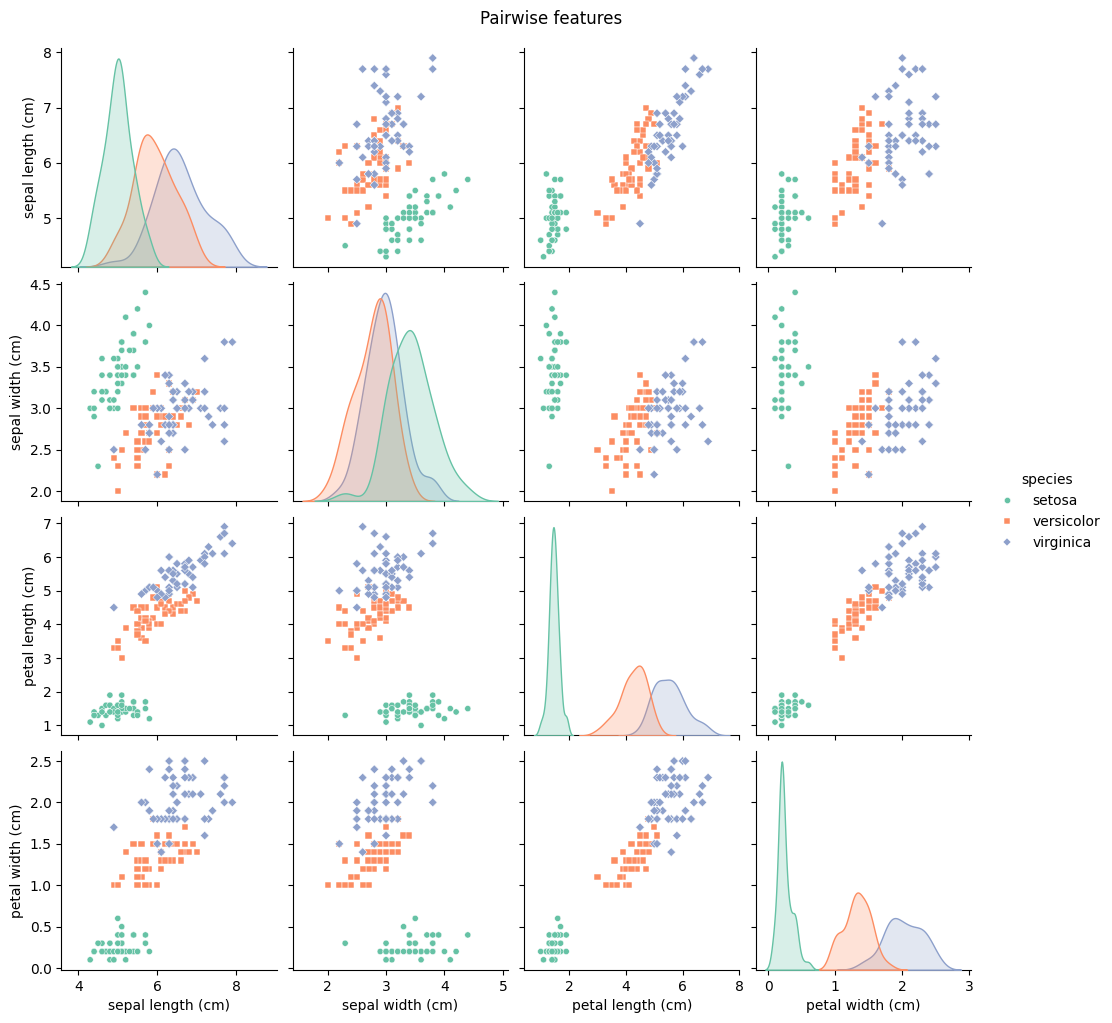

In [3]:
sns.pairplot(
    df,
    hue="species",
    palette="Set2",
    diag_kind="kde",
    markers=["o", "s", "D"],
    height=2.5,
    aspect=1,
    plot_kws=dict(s=20),
)
plt.suptitle("Pairwise features", y=1.02)
plt.show()

We can see several things with this plot:

- Some of the features are correlated with each other
- Some pairs of features separate the classes much better than others

These are two things to keep in mind when fitting a model.


### Split the dataset into a training set and a testing set


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")

X_train.shape = (75, 4)
X_test.shape = (75, 4)


### Standardize the data


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initialize and fit/train the model


In [6]:
model = LogisticRegression(random_state=0)  # random_state=0 for reproducibility
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predict on the testing set


In [7]:
y_pred = model.predict(X_test)

### Evaluate the model


Accuracy: 0.9200


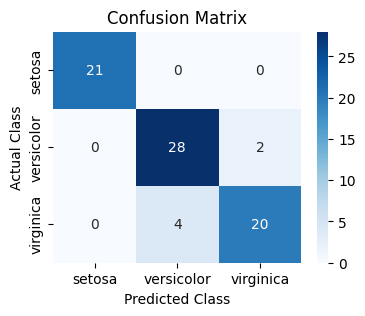

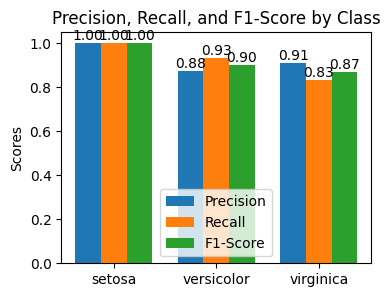

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

plot_confusion_matrix(y_test, y_pred, class_names)
plot_evaluation(y_test, y_pred, class_names)

#### Accuracy

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Accuracy measures the proportion of **correctly classified instances** (both true positives and true negatives) out of the total instances.

Where:

- $TP$ = True Positives
- $TN$ = True Negatives
- $FP$ = False Positives
- $FN$ = False Negatives

#### Precision

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Precision measures the proportion of **true positive instances** out of the instances that were **predicted as positive**. It indicates how many of the predicted positives are actually positive.

#### Recall

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Recall measures the proportion of **true positive instances** out of the **actual positive instances**. It indicates how many of the actual positives were correctly identified.

#### F1-Score

$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

The F1-Score is the **harmonic mean** of **precision and recall**. It provides a single metric that balances both precision and recall, especially useful when you need to account for both false positives and false negatives.


## Evaluation of different methods


In the following section, we will use only two features of the Iris dataset to visualize the decision boundaries of the model.

We start by defining a function to fit a given model and plot its performance and its decision boundaries.

Important note: Here, we only fit the model once because we want to plot the decision boundaries and have quick results. In practice, you should fit the model multiple times and average the results to get a more robust estimate of the model's performance. This is a process that is often performed using [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).


In [ ]:
# Function to evaluate a model and plot the results


def fit_predict_evaluate_iris(
    model, features_used: tuple[int, int], normalize: bool = True
):
    data: Bunch = load_iris()  # type: ignore
    X, y, feature_names, class_names = (
        data.data[:, features_used],
        data.target,
        [data.feature_names[i] for i in features_used],
        data.target_names,
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    if normalize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    else:
        # Trick to make not normalizing worse
        X_train[:, 0] = 100 * X_train[:, 0] + 50
        X_test[:, 0] = 100 * X_test[:, 0] + 50

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    fig, axs = plt.subplots(1, 4, figsize=(24, 5))
    plt.suptitle(
        f"{model.__class__.__name__} using features={features_used} and normalization={normalize}",
        fontsize="xx-large",
        y=1.02,
    )

    plot_confusion_matrix(y_test, y_pred, class_names, ax=axs[0])
    axs[0].set_title(axs[0].get_title() + " (Testing Data)")
    plot_evaluation(y_test, y_pred, class_names, ax=axs[1])
    axs[1].set_title(axs[1].get_title() + " (Testing Data)")
    plot_decision_boundaries(model, X_train, y_train, feature_names, ax=axs[2])
    axs[2].set_title(axs[2].get_title() + " (Training Data)")
    plot_decision_boundaries(model, X_test, y_test, feature_names, ax=axs[3])
    axs[3].set_title(axs[3].get_title() + " (Testing Data)")

    return model

### Logistic Regression

Logistic regression is a linear model for binary classification. It is a simple and interpretable model that can be used as a baseline for more complex models.

Below, we can see how the features that we decide to use have a huge impact on the performance of the model.


Accuracy: 0.7333


LogisticRegression(random_state=0)

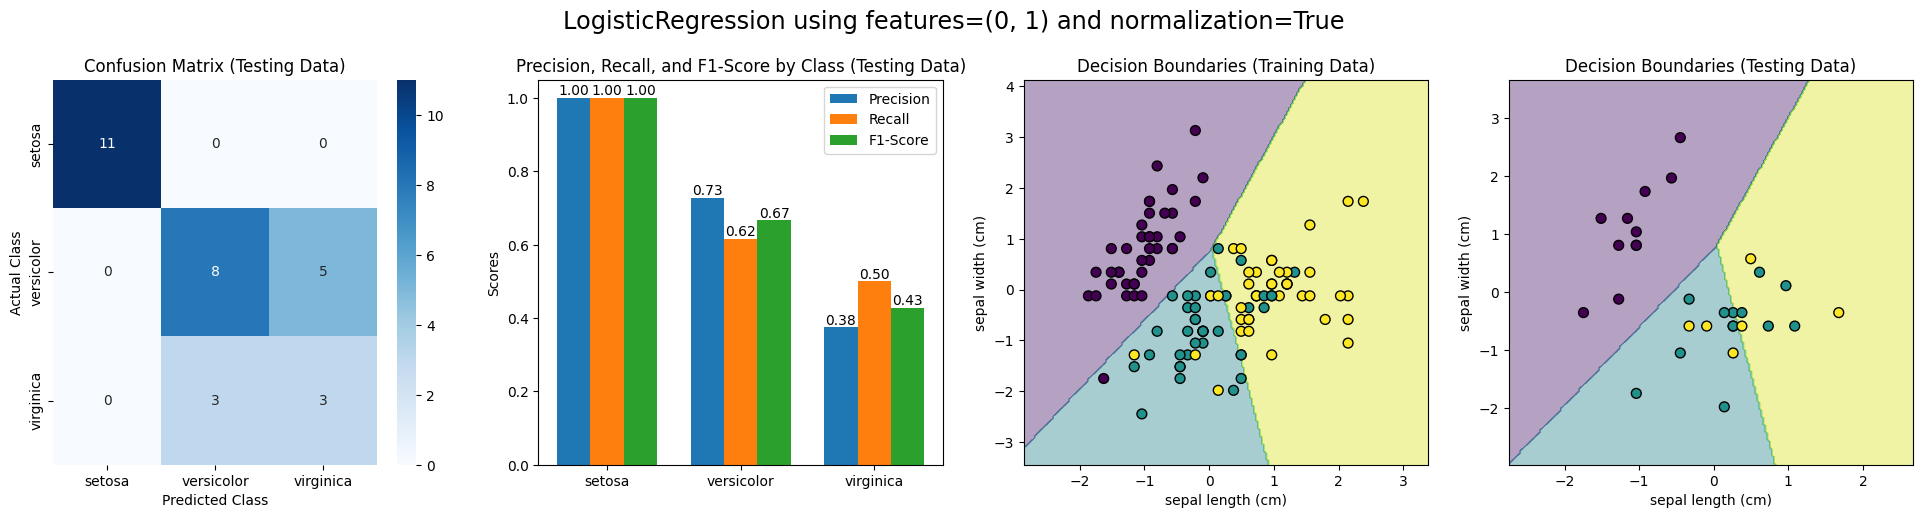

In [10]:
fit_predict_evaluate_iris(LogisticRegression(random_state=0), (0, 1))

Accuracy: 0.9667


LogisticRegression(random_state=0)

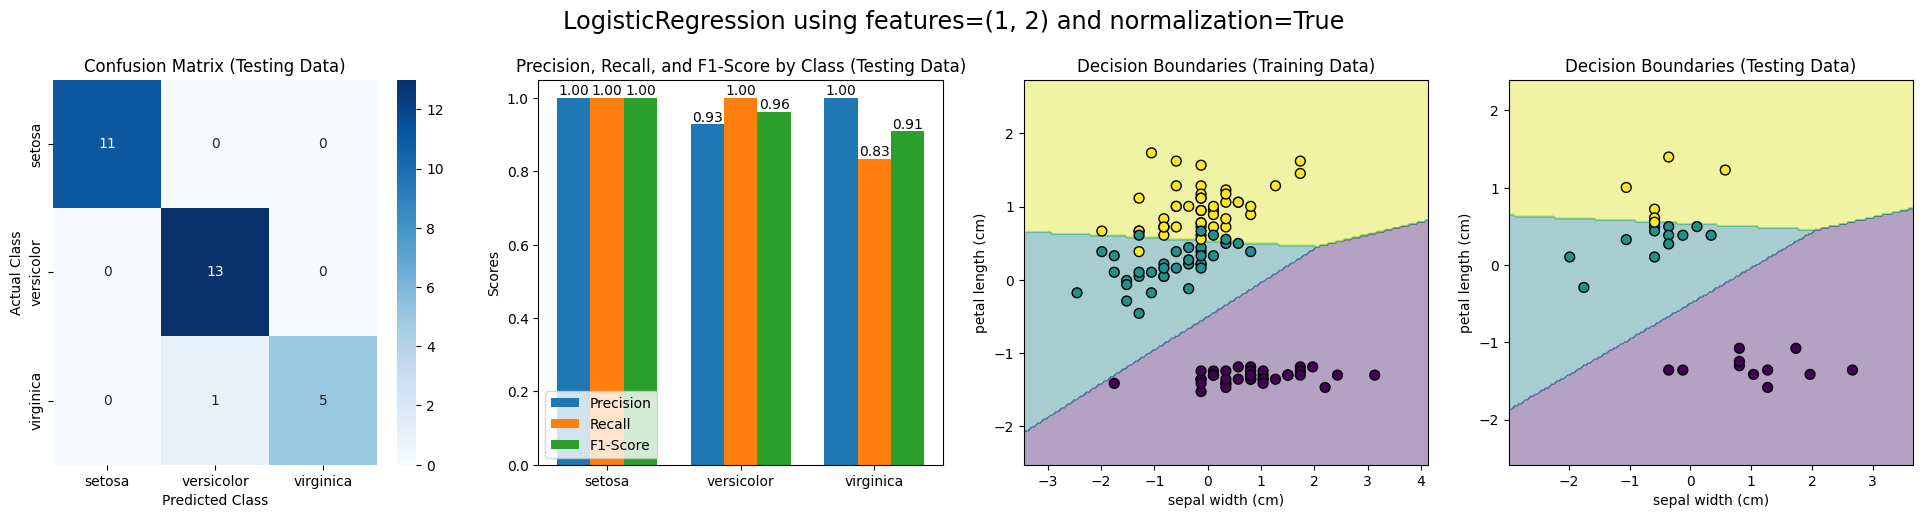

In [11]:
fit_predict_evaluate_iris(LogisticRegression(random_state=0), (1, 2))

Accuracy: 0.9667


LogisticRegression(random_state=0)

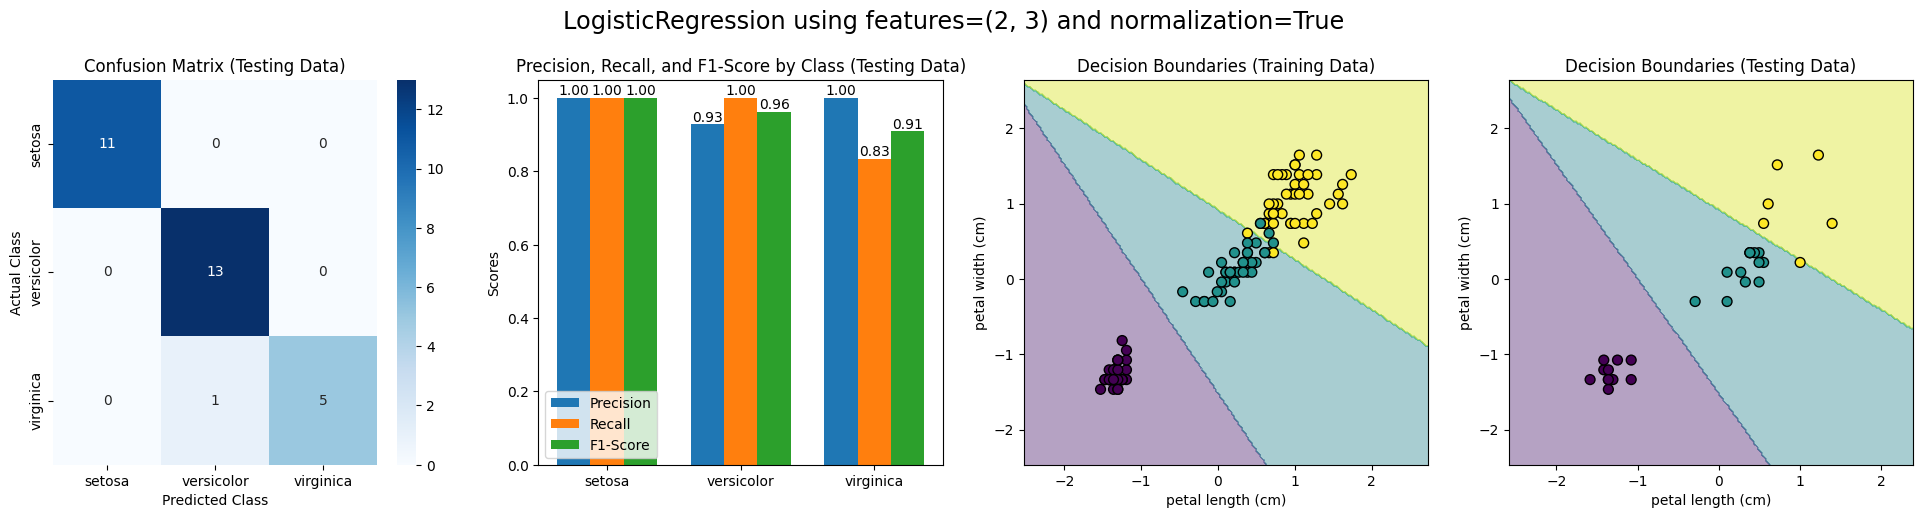

In [12]:
fit_predict_evaluate_iris(LogisticRegression(random_state=0), (2, 3))

Accuracy: 0.9667


LogisticRegression(random_state=0)

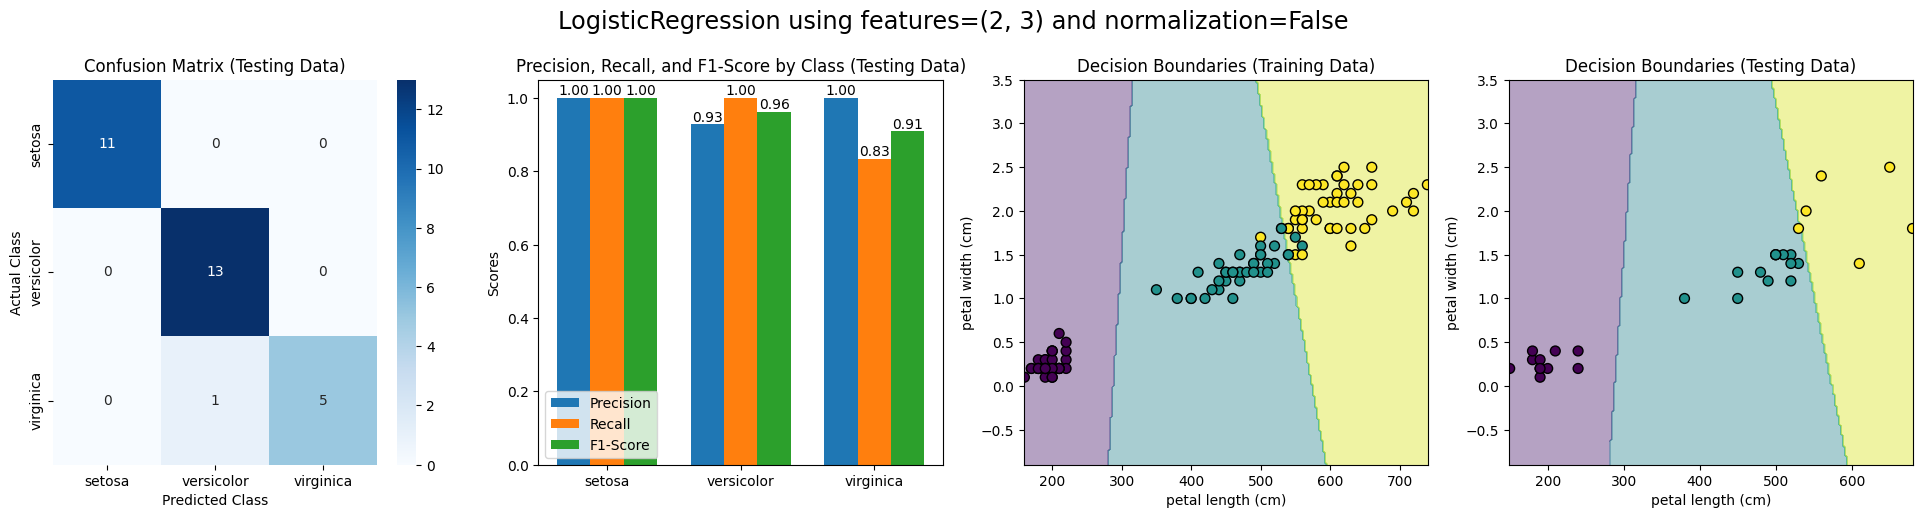

In [13]:
fit_predict_evaluate_iris(LogisticRegression(random_state=0), (2, 3), normalize=False)

### Decision Trees

For trees the main arguments that you can control are:

- `criterion` and `splitter` to decide how to iteratively cut each node in two children nodes
- `max_depth` to decide the maximum depth of the tree, i.e. how large the tree can be. This criteria is the main control over the overfitting of trees, as deeper trees tend to learn the noise and have a worse generalization capability
- `max_features` is useful when your data has many features and you know that the tree should use most of them and not only a few, so you can prevent it from always picking the same features. It also speeds up fitting

Trees are very interpretable models and are also very prone to overfitting. They are very useful for understanding the data and the relationships between features, but they are not the best models for generalization. You can see in the examples below how the maximum depth of the tree is important to avoid underfitting and overfitting.


Accuracy: 0.5667


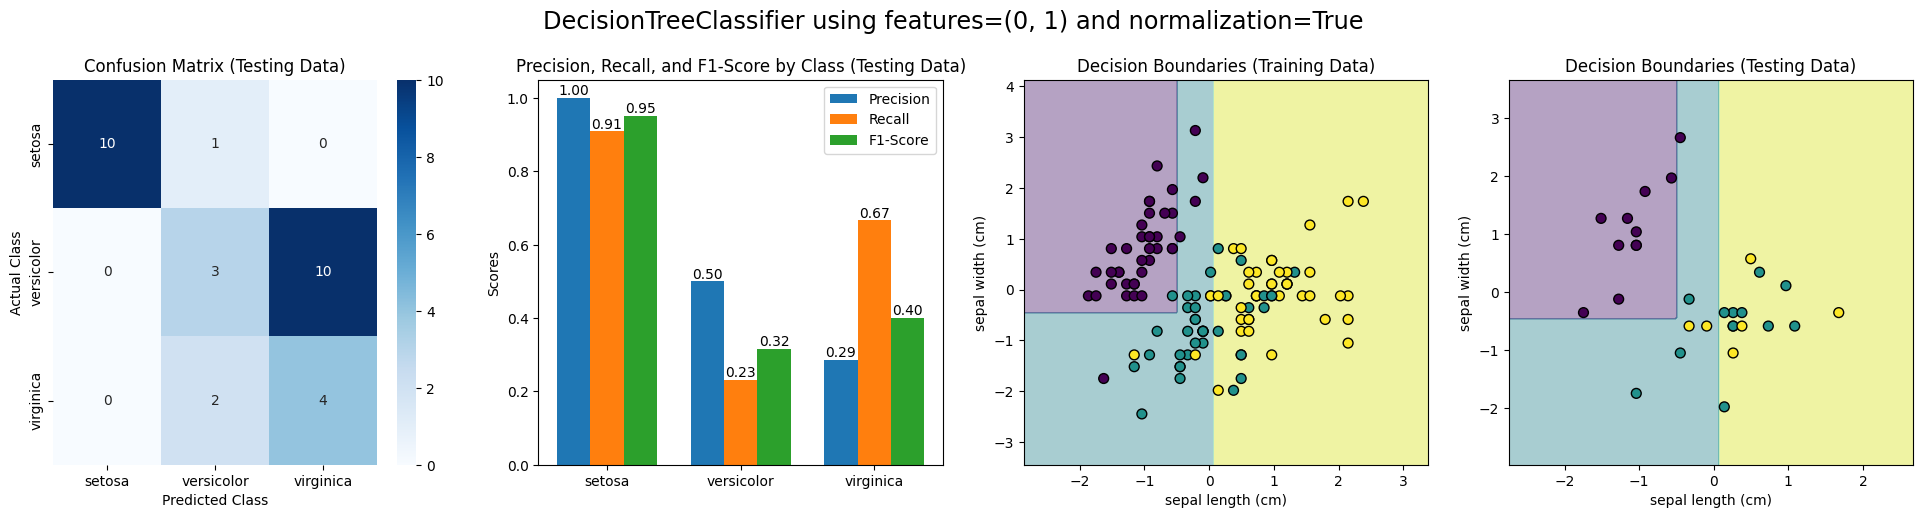

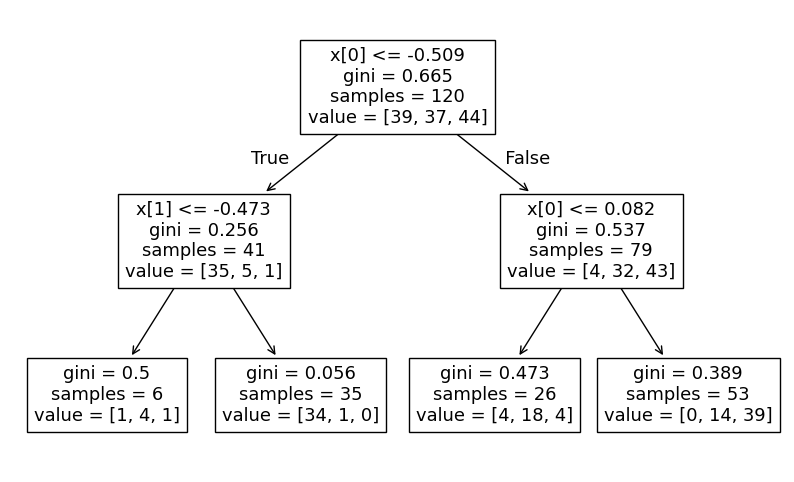

In [14]:
tree = fit_predict_evaluate_iris(
    DecisionTreeClassifier(random_state=0, max_depth=2), (0, 1)
)
plt.show()
plt.figure(figsize=(10, 6))
plot_tree(tree)
plt.show()

Accuracy: 0.6333


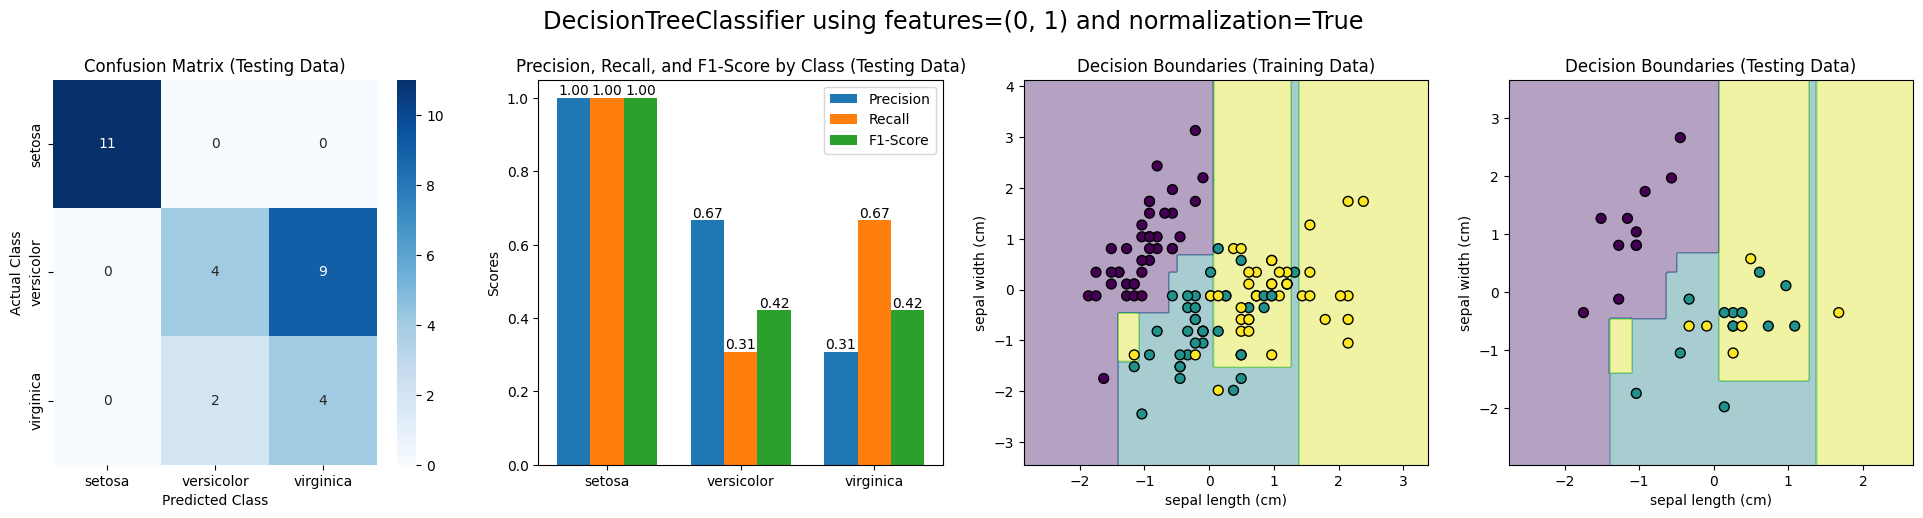

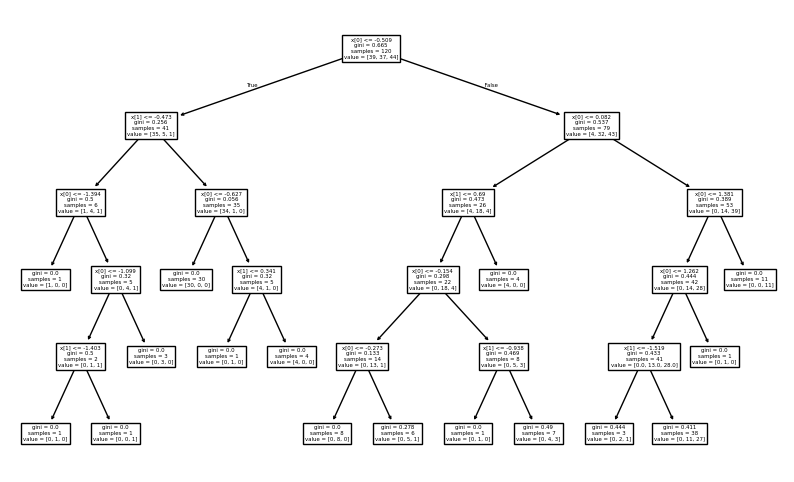

In [15]:
tree = fit_predict_evaluate_iris(
    DecisionTreeClassifier(random_state=0, max_depth=5), (0, 1)
)
plt.show()
plt.figure(figsize=(10, 6))
plot_tree(tree)
plt.show()

Accuracy: 0.6333


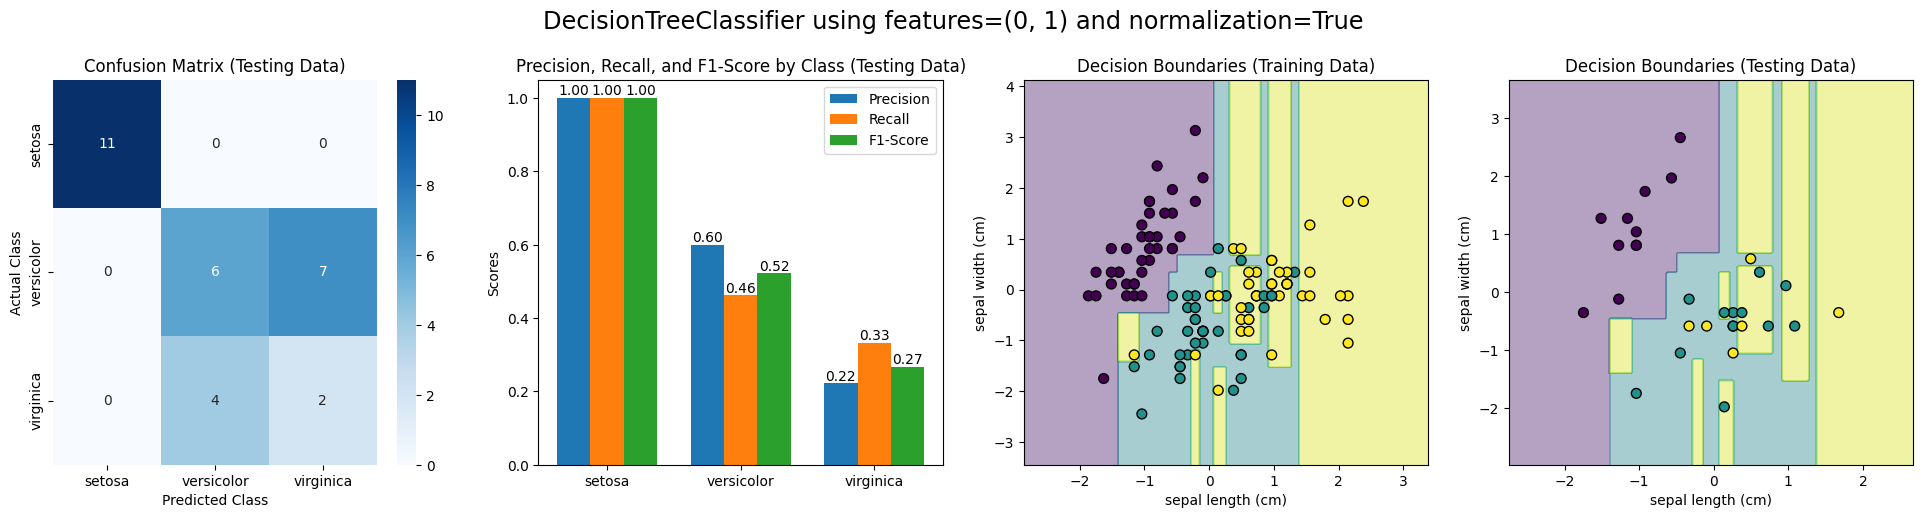

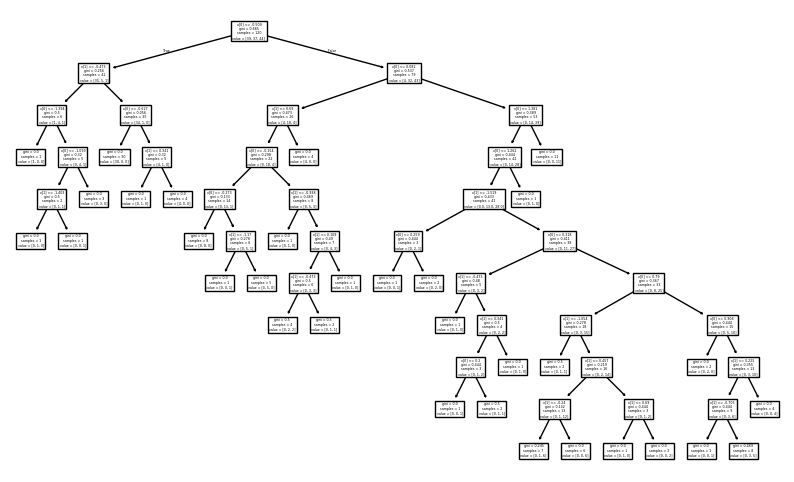

In [16]:
tree = fit_predict_evaluate_iris(
    DecisionTreeClassifier(random_state=0, max_depth=10), (0, 1)
)
plt.show()
plt.figure(figsize=(10, 6))
plot_tree(tree)
plt.show()

### Random Forests

Random Forests are an example of ensemble methods, combining several weak learners into a better strong learner. The idea here is to combine multiple trees with a low depth, which are individually not so good, but together take the best decision in majority. The main arguments, besides normal tree arguments from Decision Trees, are:

- the usual tree parameters `criterion`, `max_depth` and `max_features`
- `n_estimators` to decide the number of trees in the ensemble
- `max_samples` to use only a random subset of the training set for each individual tree. Setting a lower value helps creating more specialized weak trees, which can help the ensemble to take the right decision in edge cases

Random Forests are usually more robust than Decision Trees, but they are also more complex and harder to interpret. They gain in generalization power at the cost of interpretability. However, they can still be prone to overfitting, especially if you set the parameters `max_samples` or `max_depth` too high.


Accuracy: 0.7000


RandomForestClassifier(max_depth=3, n_estimators=1, random_state=0)

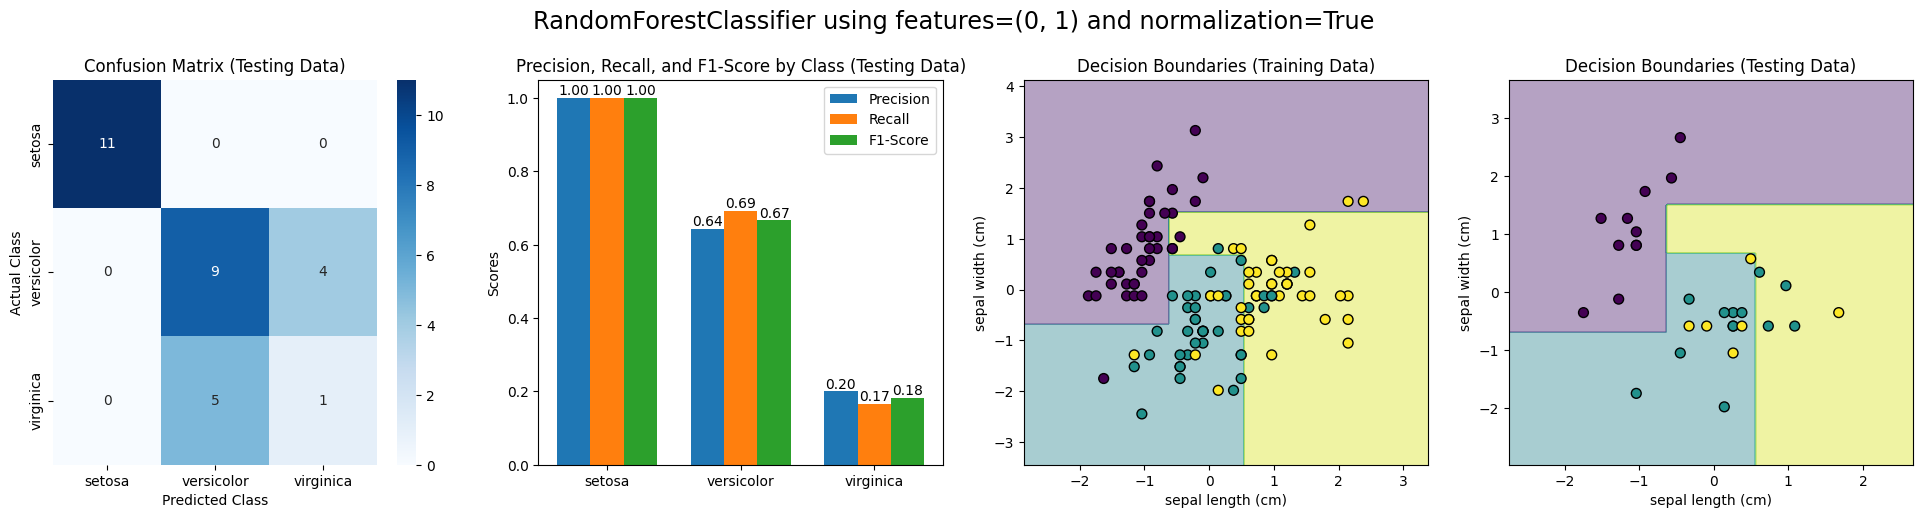

In [17]:
fit_predict_evaluate_iris(
    RandomForestClassifier(n_estimators=1, random_state=0, max_depth=3), (0, 1)
)

Accuracy: 0.7667


RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

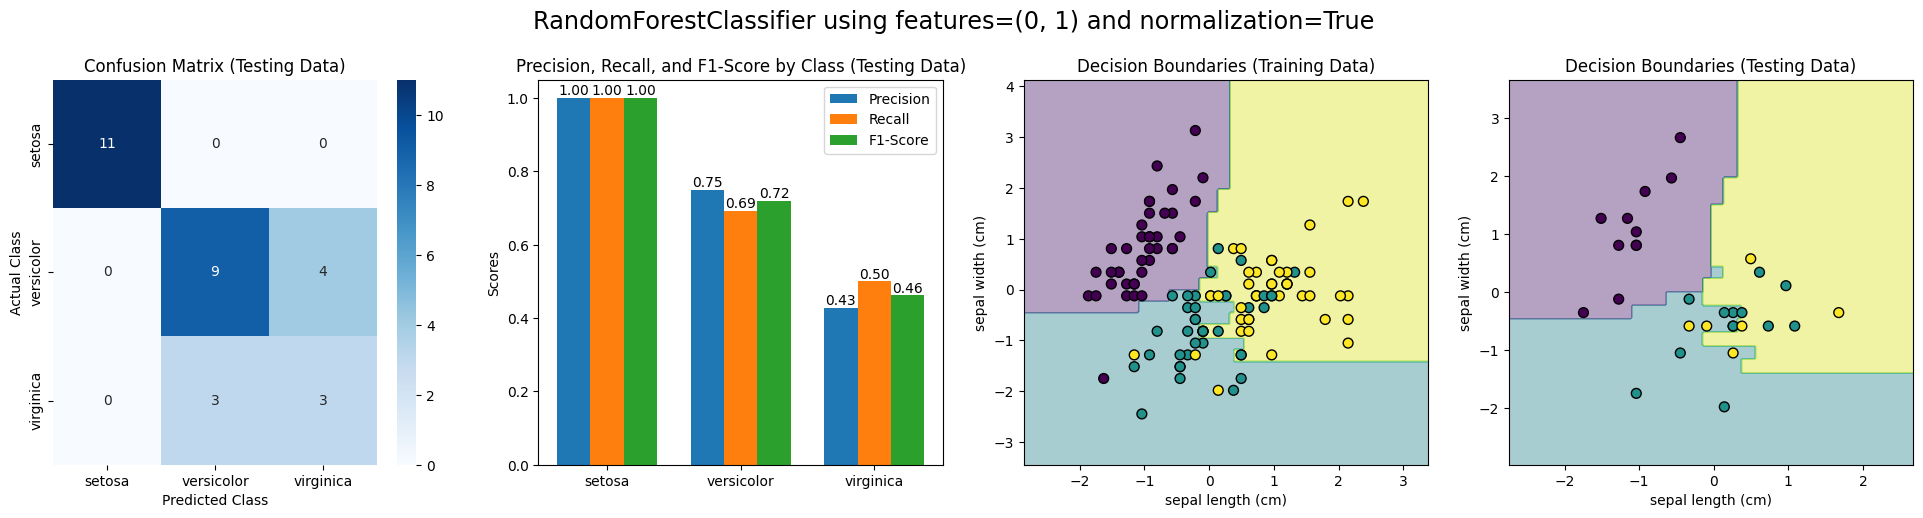

In [18]:
fit_predict_evaluate_iris(
    RandomForestClassifier(n_estimators=10, random_state=0, max_depth=3), (0, 1)
)

Accuracy: 0.6667


RandomForestClassifier(max_depth=3, random_state=0)

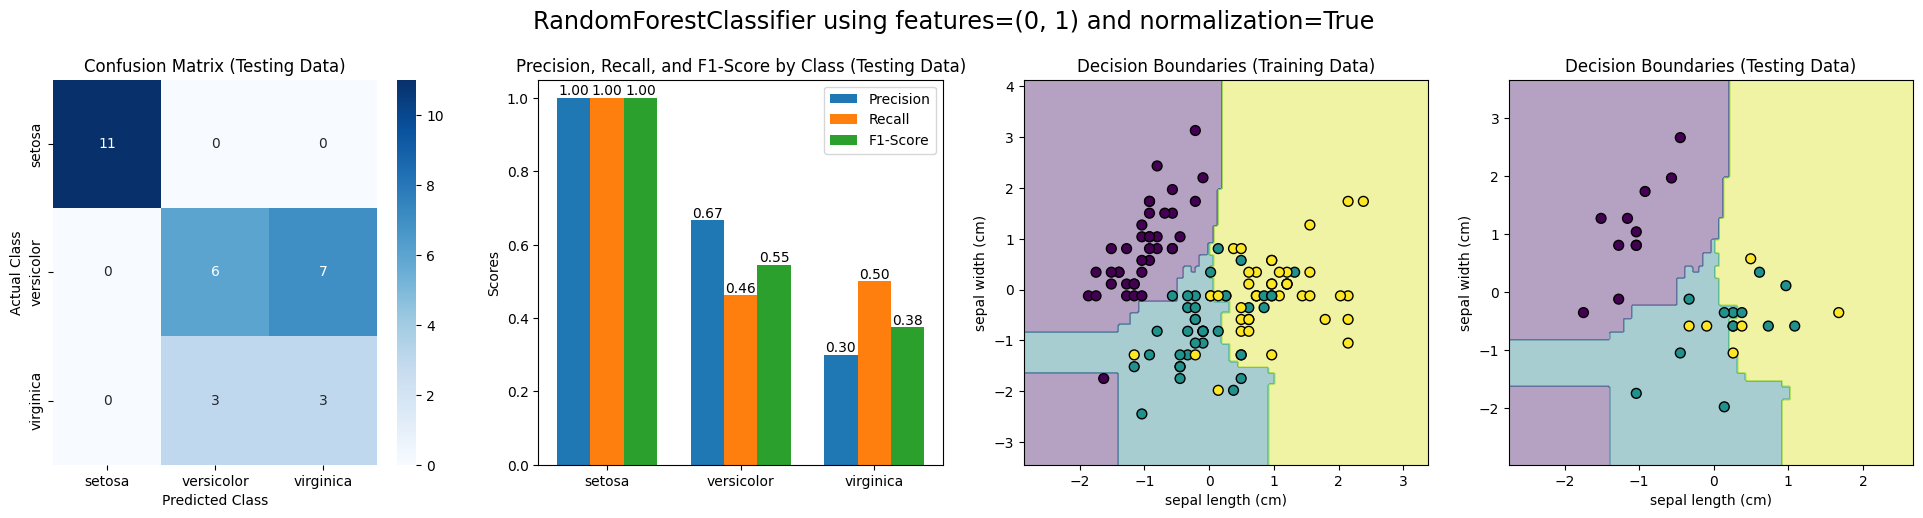

In [19]:
fit_predict_evaluate_iris(
    RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3), (0, 1)
)

Accuracy: 0.5667


RandomForestClassifier(random_state=0)

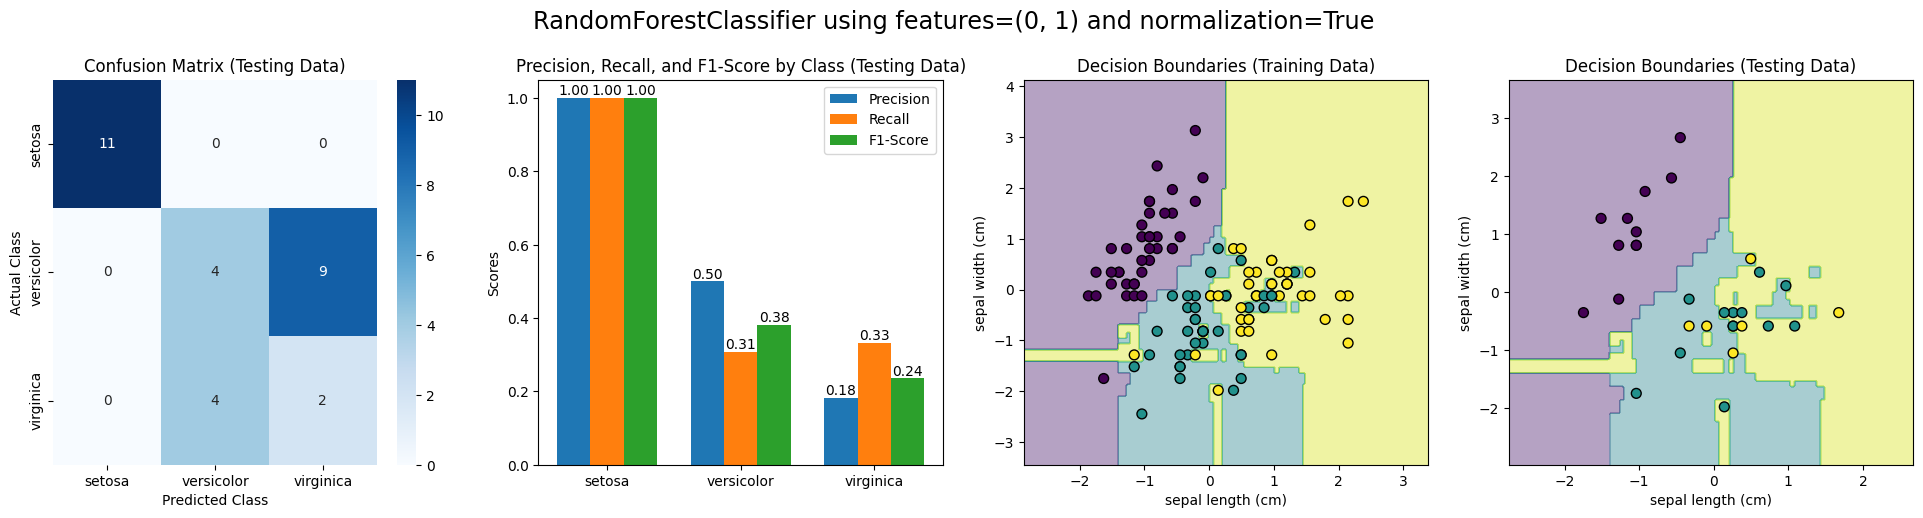

In [20]:
fit_predict_evaluate_iris(
    RandomForestClassifier(n_estimators=100, random_state=0), (0, 1)
)

Accuracy: 0.6667


RandomForestClassifier(max_samples=0.1, random_state=0)

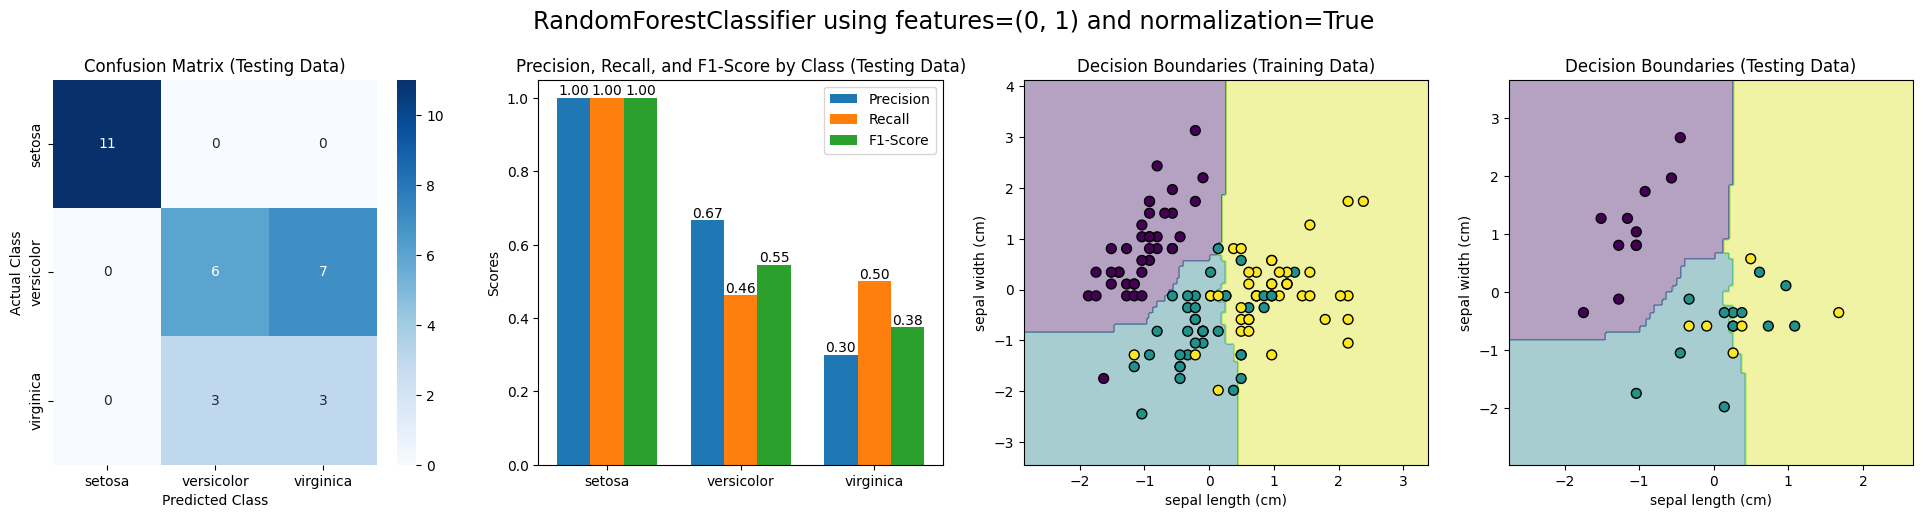

In [21]:
fit_predict_evaluate_iris(
    RandomForestClassifier(n_estimators=100, random_state=0, max_samples=0.1), (0, 1)
)

### K-Nearest Neighbors

K-Nearest Neighbors is a quite simple method that takes the closest training points as reference to make a prediction. The only parameters that really affect the classification results are:

- `n_neighbors`: the number of neighbors to consider to take a decision. More neighbors mean smoother boundaries.
- `weights`: the weights to use for each neighbor, depending or not on their distance to the query point.
- `metric`: the method to use to compute the distance.

K-Nearest Neighbors is a very simple method that can be very powerful in some cases, but it is also very sensitive to the scale of the data and the number of neighbors. It is also very slow to predict, as it needs to compute the distance to all training points for each query point. As you can see below, the number of neighbors is very important to avoid overfitting and underfitting. In general, a higher number of neighbors gives smoother boundaries, less overfitting and less sensibility to outliers.


Accuracy: 0.6000


KNeighborsClassifier(n_neighbors=1)

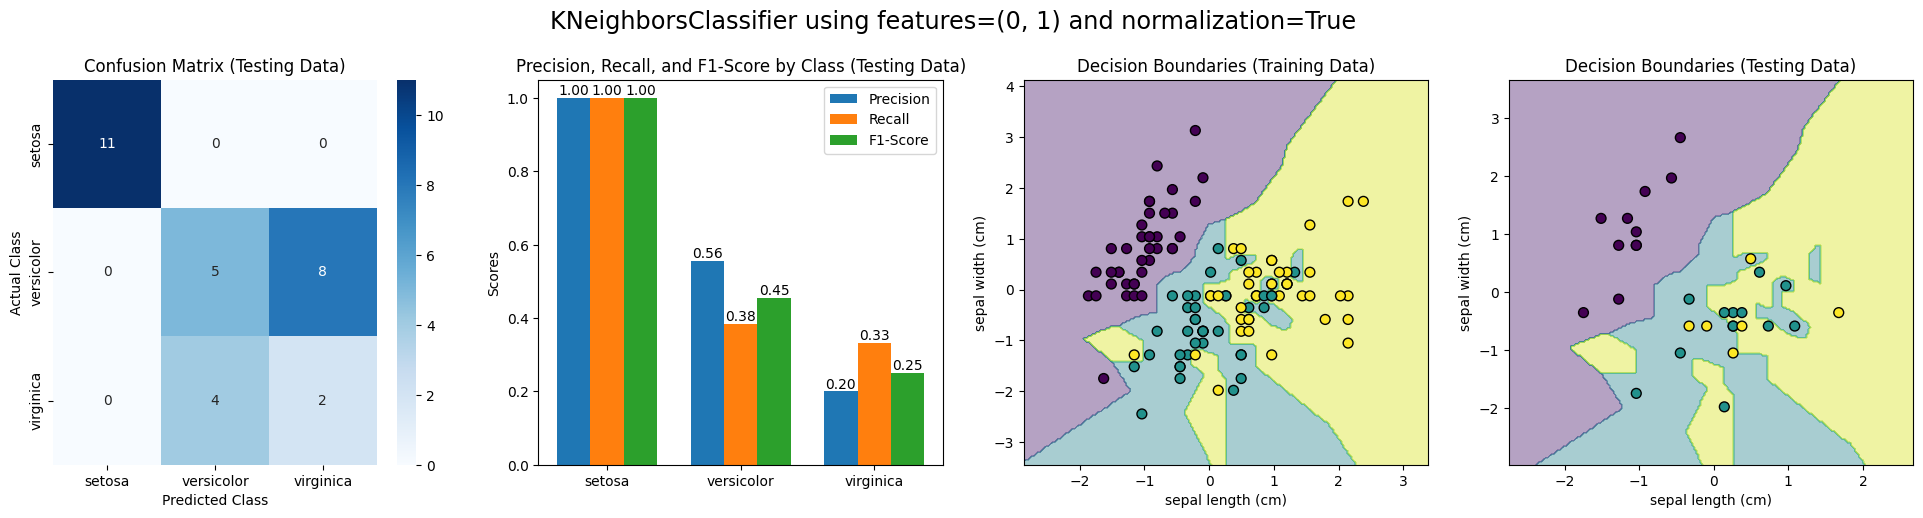

In [22]:
fit_predict_evaluate_iris(KNeighborsClassifier(n_neighbors=1), (0, 1))

Accuracy: 0.6000


KNeighborsClassifier()

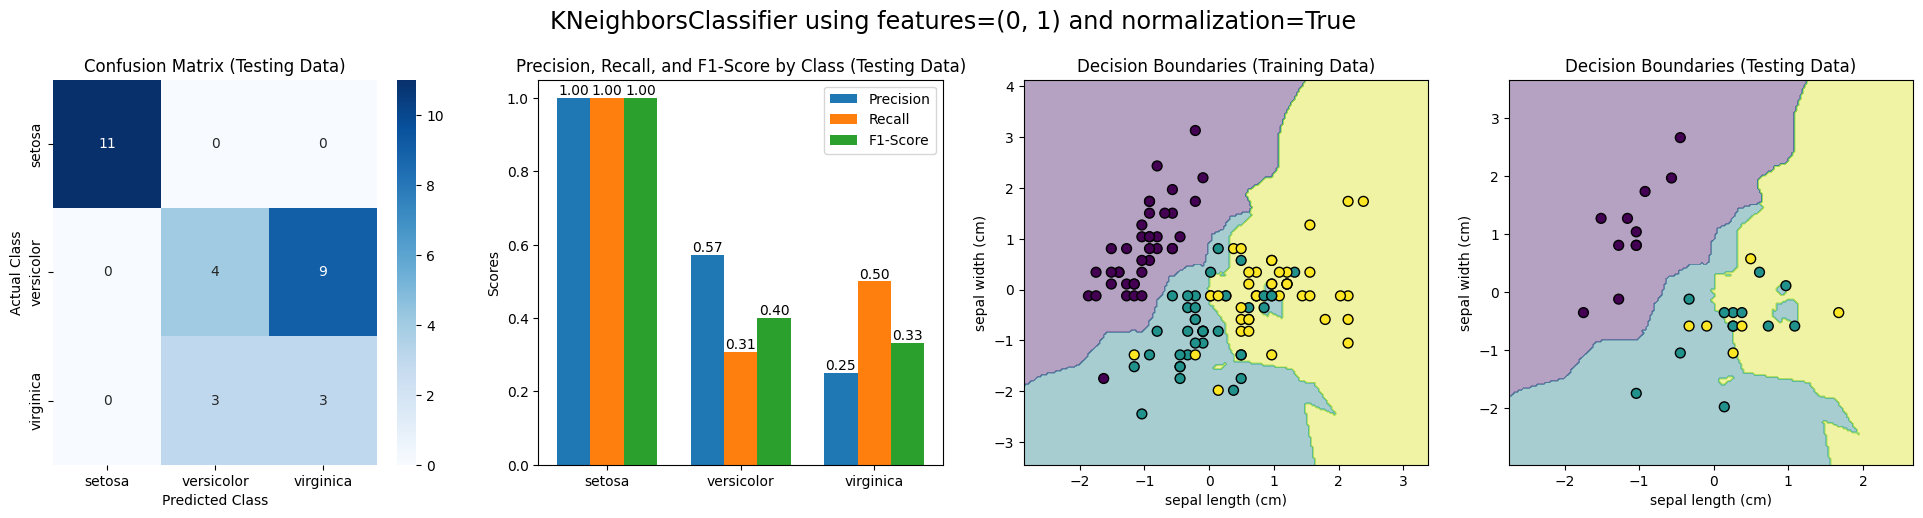

In [23]:
fit_predict_evaluate_iris(KNeighborsClassifier(n_neighbors=5), (0, 1))

Accuracy: 0.6333


KNeighborsClassifier(n_neighbors=20)

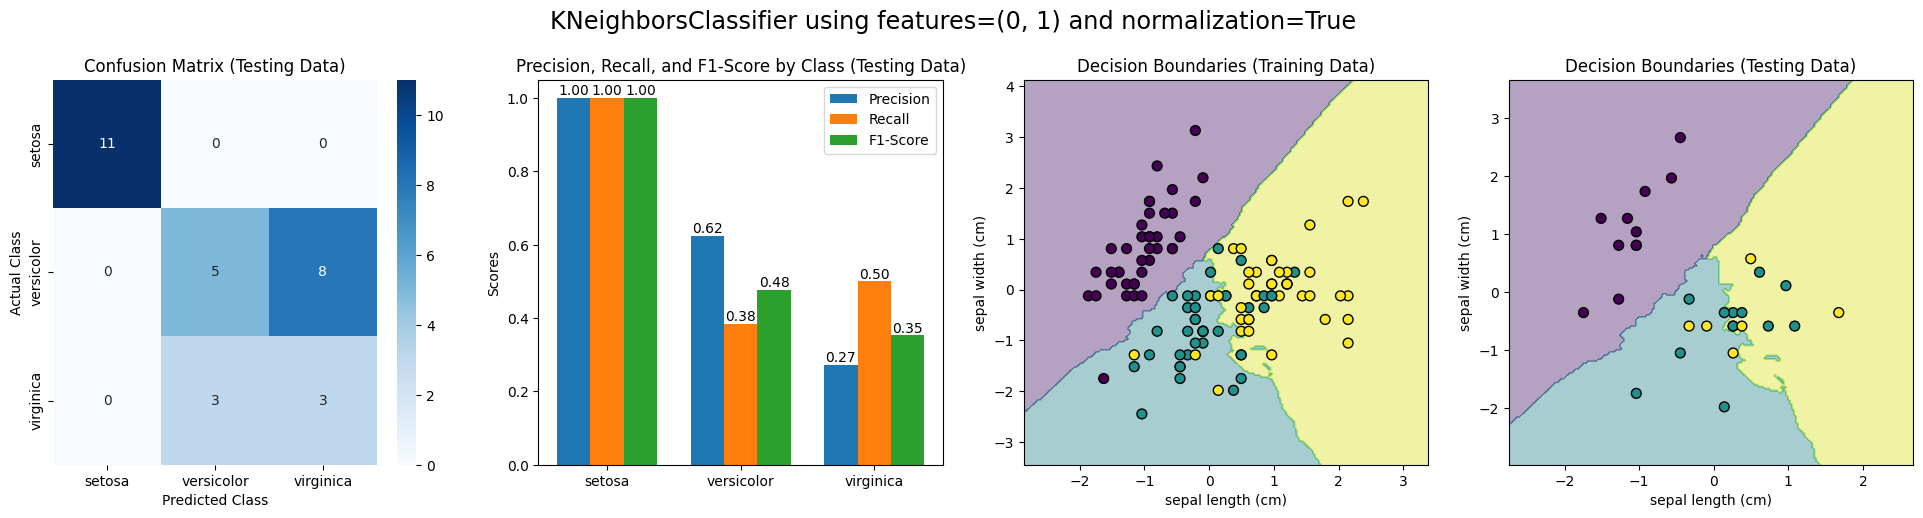

In [24]:
fit_predict_evaluate_iris(KNeighborsClassifier(n_neighbors=20), (0, 1))

Accuracy: 0.5667


KNeighborsClassifier(weights='distance')

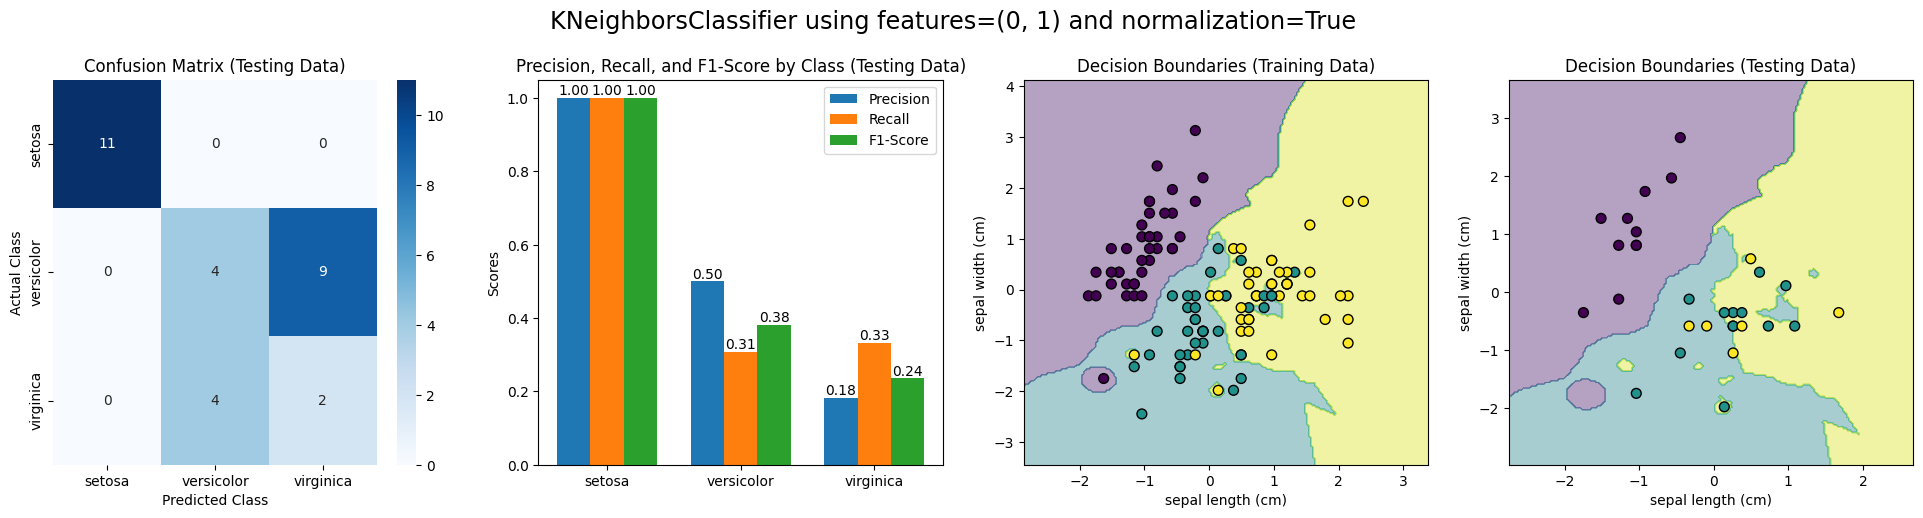

In [25]:
fit_predict_evaluate_iris(
    KNeighborsClassifier(n_neighbors=5, weights="distance"), (0, 1)
)

Accuracy: 0.6000


KNeighborsClassifier(n_neighbors=20, weights='distance')

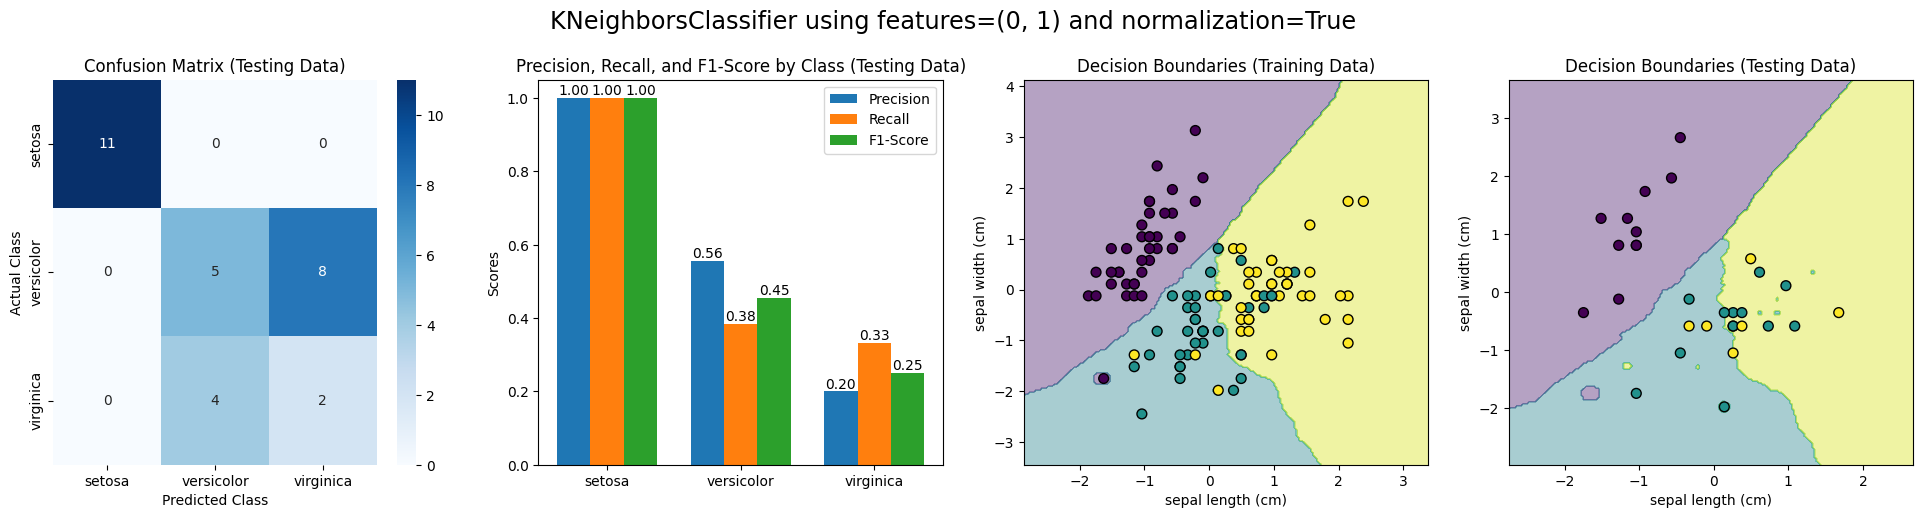

In [26]:
fit_predict_evaluate_iris(
    KNeighborsClassifier(n_neighbors=20, weights="distance"), (0, 1)
)

### Support Vector Machines

With Support Vector Machines, you can choose different kinds of kernels which are different functions giving different kinds of boundaries.


Accuracy: 0.6667


SVC(kernel='poly')

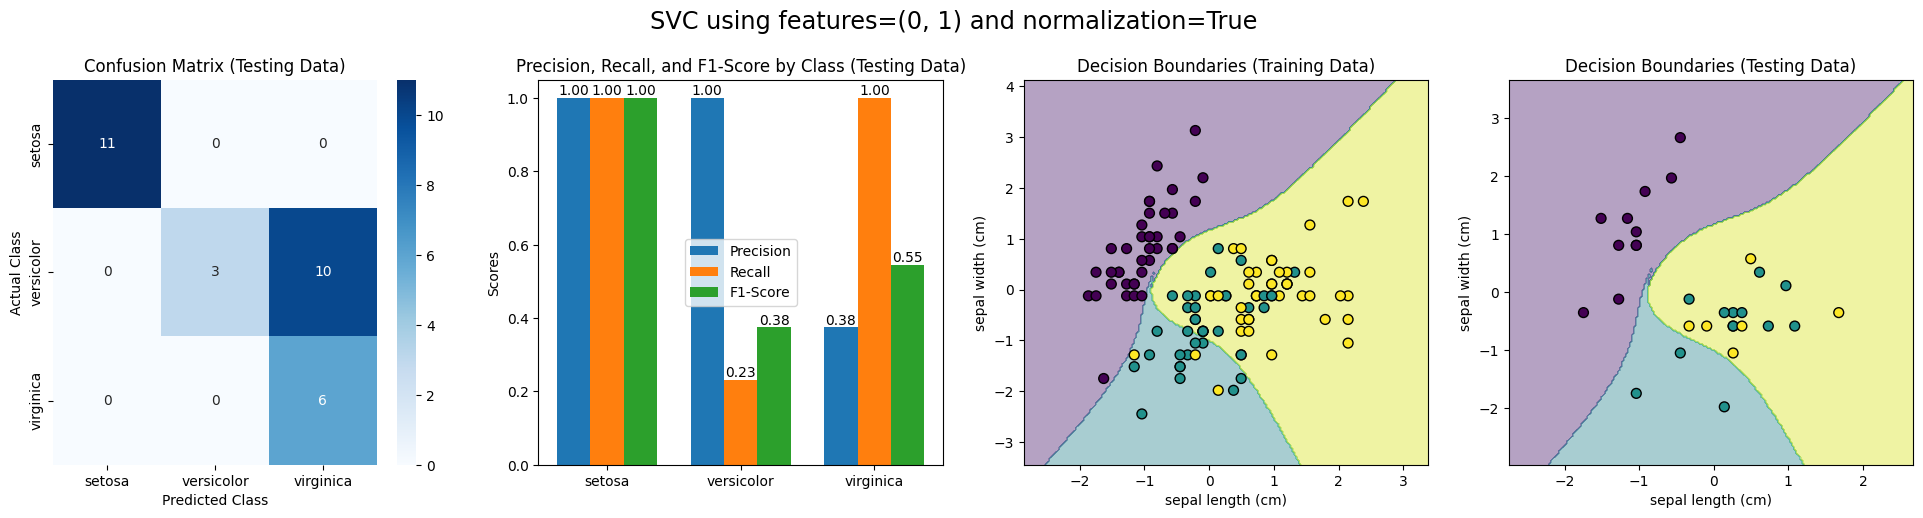

In [27]:
fit_predict_evaluate_iris(SVC(kernel="poly", degree=3), (0, 1))

Accuracy: 0.4667


SVC(degree=10, kernel='poly')

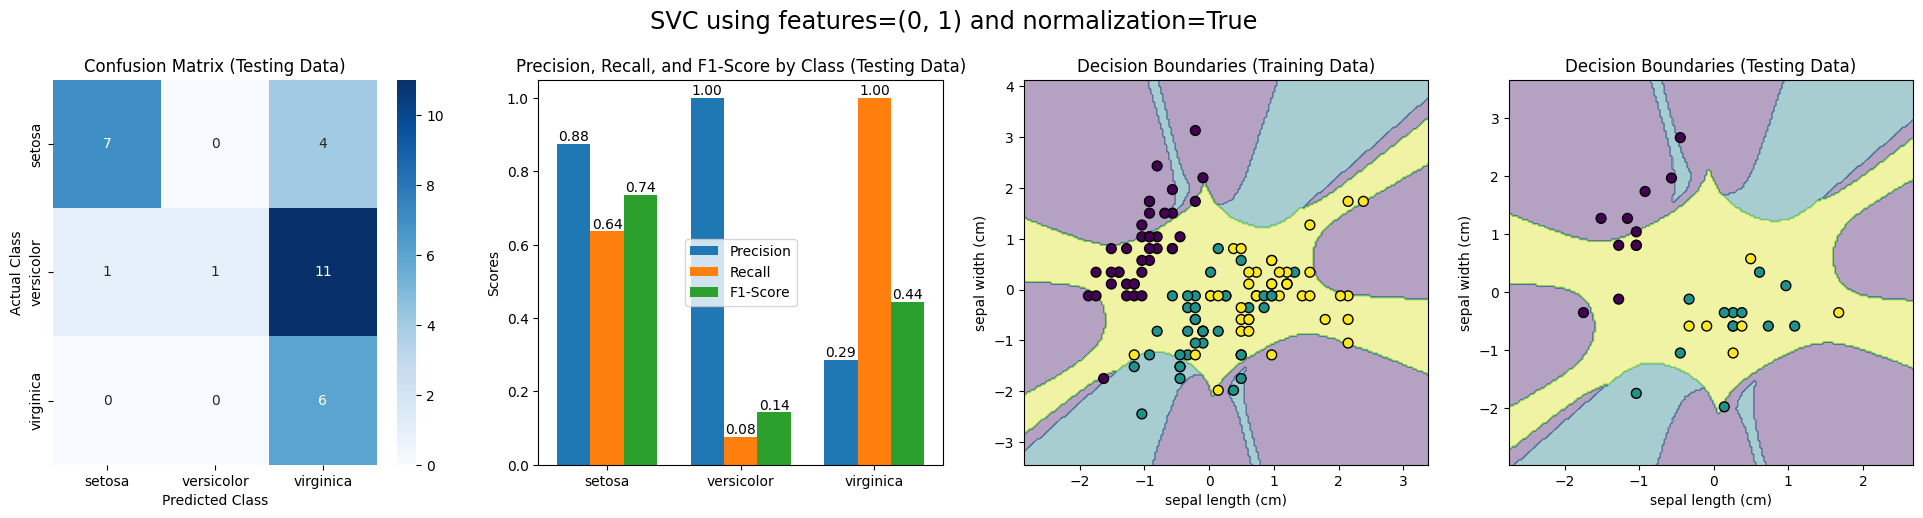

In [28]:
fit_predict_evaluate_iris(SVC(kernel="poly", degree=10), (0, 1))

Accuracy: 0.6333


SVC()

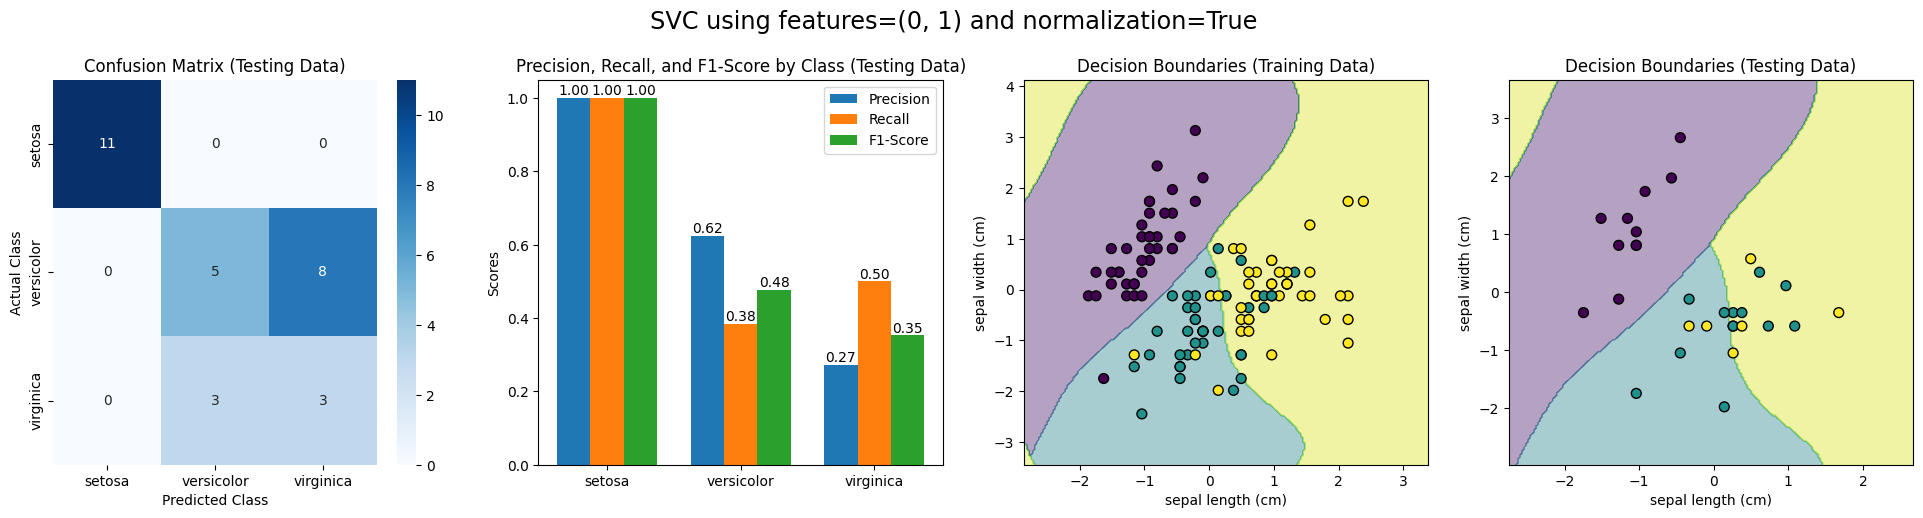

In [29]:
fit_predict_evaluate_iris(SVC(kernel="rbf"), (0, 1))

Accuracy: 0.7000


SVC(kernel='sigmoid')

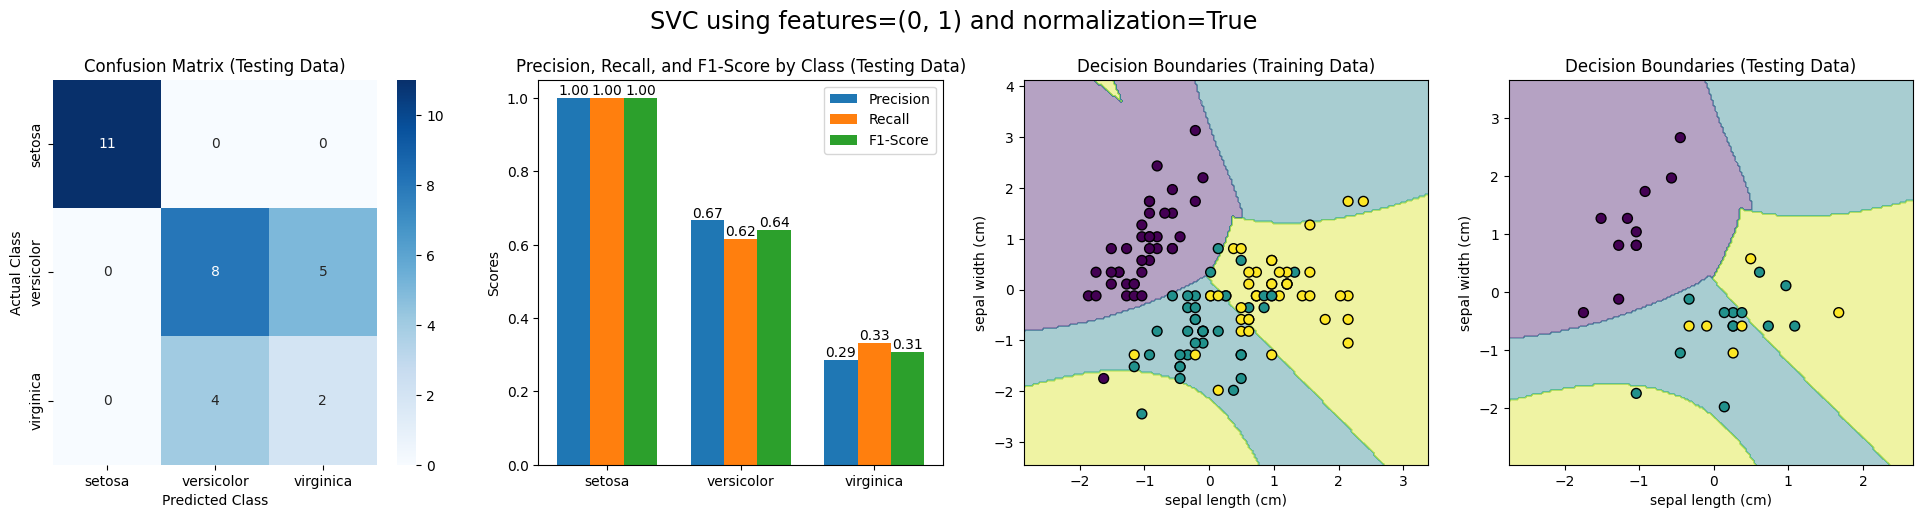

In [30]:
fit_predict_evaluate_iris(SVC(kernel="sigmoid"), (0, 1))

## Unsupervised Methods


### PCA

PCA is not a classification method but a dimensionality reduction method. This means that it cannot be trained to make predictions, but it can be fitted to create $n$ features for each samples given $m$ features initially, with $n<m$.

In the following example, we will use PCA to reduce the number of features from 4 to 2 and plot the samples in this new space.


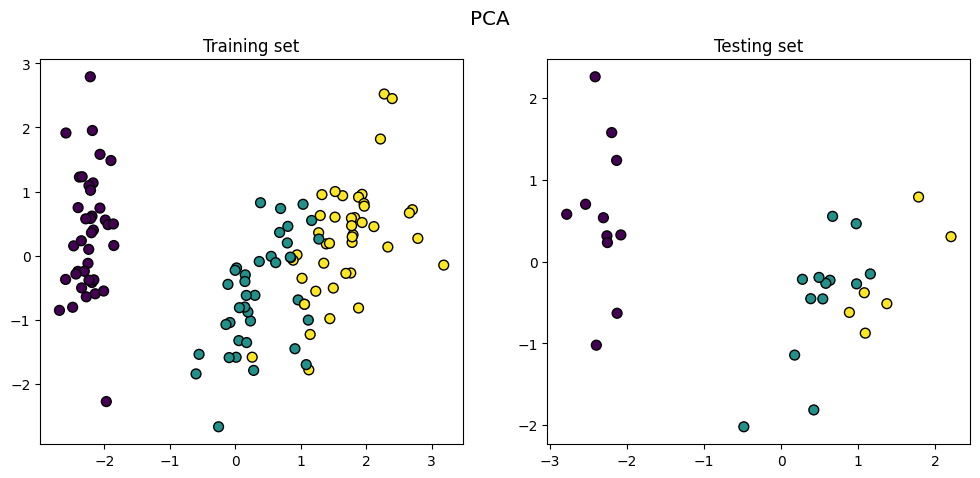

In [31]:
normalize = True

data: Bunch = load_iris()  # type: ignore
X, y, feature_names, class_names = (
    data.data,
    data.target,
    data.feature_names,
    data.target_names,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

if normalize:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
else:
    # Trick to make not normalizing worse
    X_train[:, 0] = 100 * X_train[:, 0] + 50
    X_test[:, 0] = 100 * X_test[:, 0] + 50

pca = PCA(n_components=2)
pca.fit(X_train, y_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle("PCA", fontsize="x-large")
plt.subplot(1, 2, 1)
plt.scatter(
    X_train_transformed[:, 0],
    X_train_transformed[:, 1],
    c=y_train,
    s=50,
    edgecolor="k",
    cmap="viridis",
)
plt.title("Training set")
plt.subplot(1, 2, 2)
plt.scatter(
    X_test_transformed[:, 0],
    X_test_transformed[:, 1],
    c=y_test,
    s=50,
    edgecolor="k",
    cmap="viridis",
)
plt.title("Testing set")
plt.show()

### t-SNE

t-SNE is another dimensionality reduction method, but it is more focused on visualization than PCA. It is a non-linear method that tries to keep the local structure of the data in the new space. This means that samples that are close in the original space will be close in the new space, but the global structure is not preserved, unlike PCA which tries to keep the global structure.


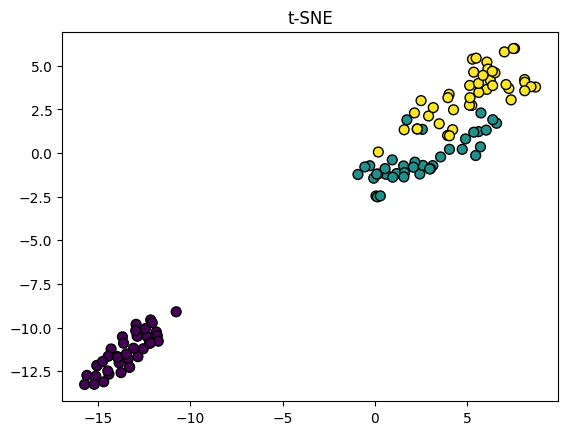

In [32]:
tsne = TSNE(n_components=2)
X_train_transformed = tsne.fit_transform(X_train, y_train)

plt.scatter(
    X_train_transformed[:, 0],
    X_train_transformed[:, 1],
    c=y_train,
    s=50,
    edgecolor="k",
    cmap="viridis",
)
plt.title("t-SNE")
plt.show()

It is interesting to see how t-SNE can separate the classes very well, even though it is an unsupervised method (which means it does not use the labels). It also performs much better at separating the classes than PCA.


### K-Means

[K-Means](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) is a clustering method that tries to find $k$ clusters in the data. It is an unsupervised method, meaning that it does not use the labels of the data to find the clusters, and is therefore rather used when we don't have labels.

The main argument is the number of clusters to find, but there are also other arguments to control the initialization of the centroids, the number of iterations, etc.


Accuracy: 0.7333


KMeans(n_clusters=3, random_state=2)

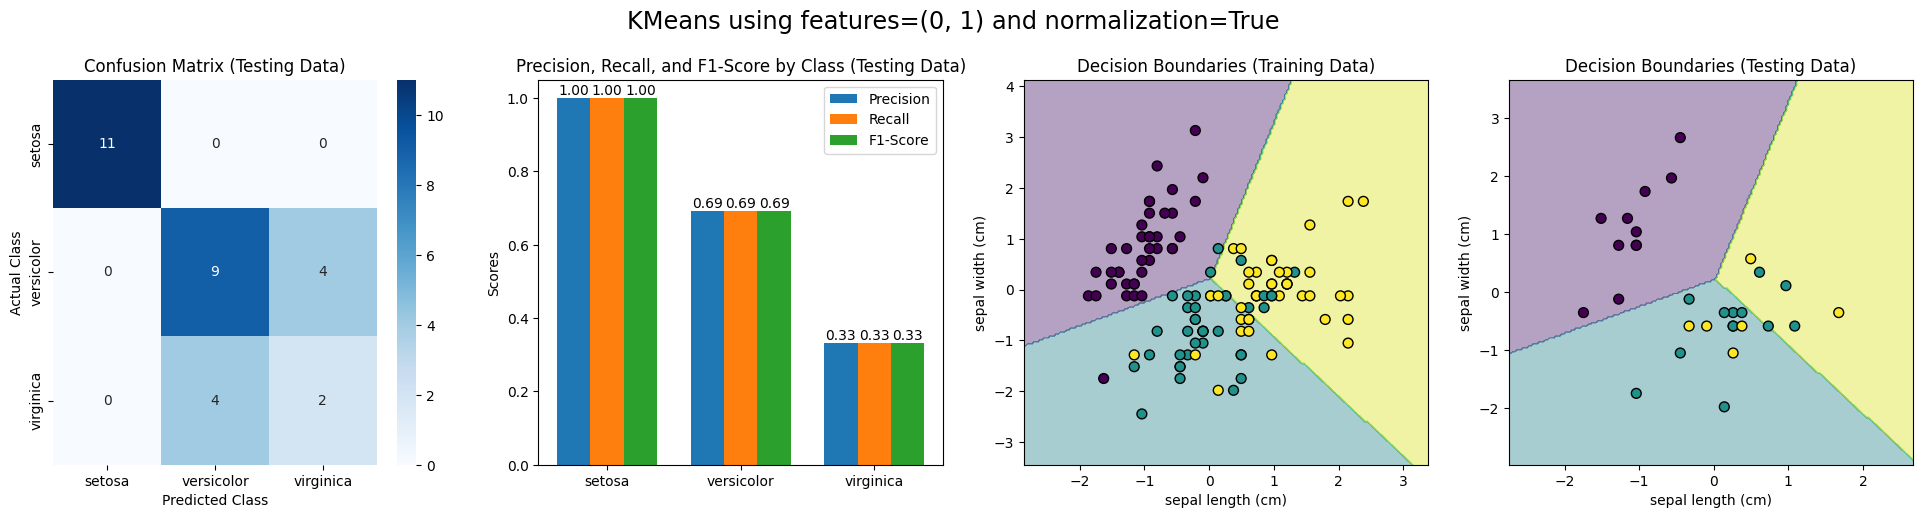

In [33]:
fit_predict_evaluate_iris(KMeans(n_clusters=3, random_state=2), (0, 1))